In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy.random as rnd

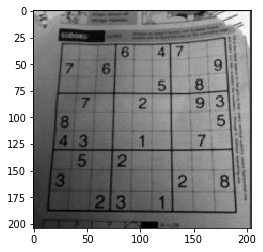

In [3]:
img= cv2.imread('ada_threshold.jpg', cv2.IMREAD_GRAYSCALE)
imgplot = plt.imshow(img, 'gray')

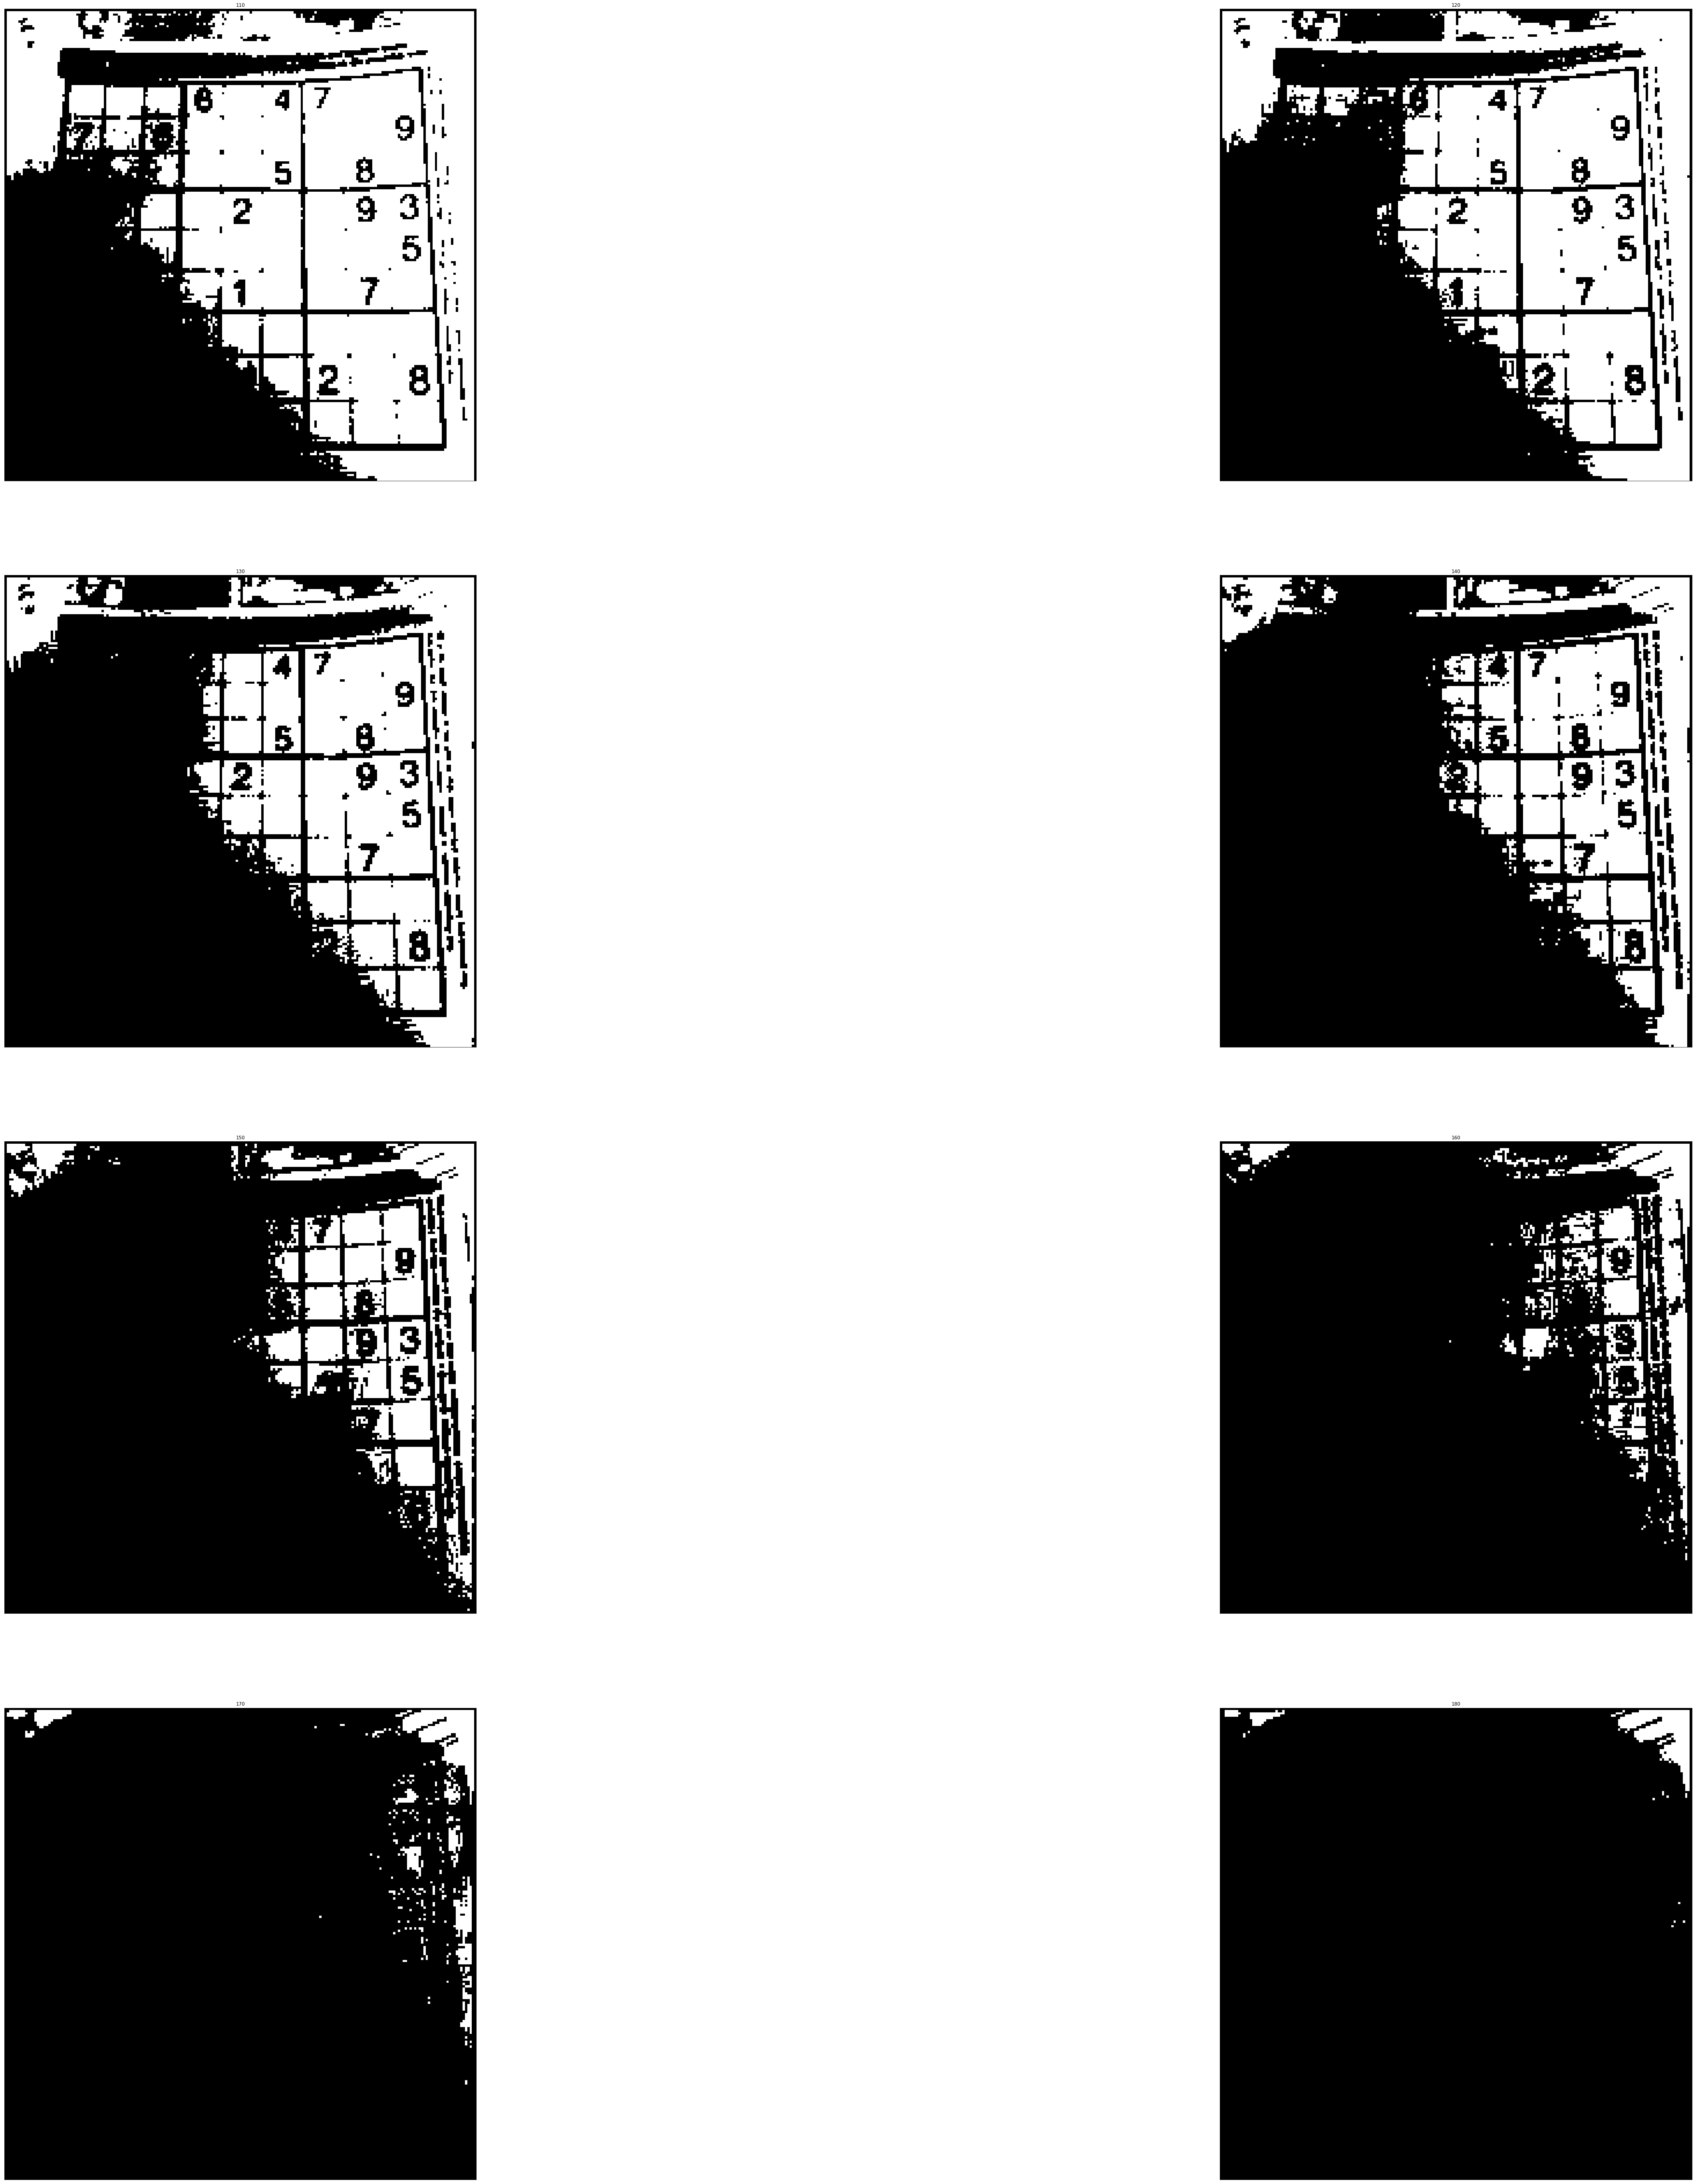

In [4]:
fig = plt.figure(figsize = (100,100))

for i in range(1,9):
    ret, thresh = cv2.threshold(img,100+10*i,255, cv2.THRESH_BINARY)
    plt.subplot(4,2,i)
    plt.title(100+10*i)
    plt.imshow(thresh,'gray')
    plt.xticks([]),plt.yticks([])

In [5]:
print(img.shape)

(204, 204)


In [6]:
img_flat = img.reshape(1, img.shape[0]*img.shape[1])

In [7]:
print(img_flat.shape)

(1, 41616)


In [8]:
A = np.ones((41616, 3), dtype=np.int64)
A.shape

(41616, 3)

In [9]:
for i in range(0,41616):
    A[i,0] = i//204 + 1
    A[i,1] = i%204 + 1

In [10]:
print(A)

[[  1   1   1]
 [  1   2   1]
 [  1   3   1]
 ...
 [204 202   1]
 [204 203   1]
 [204 204   1]]


In [11]:
X = np.matmul(np.linalg.pinv(A),img_flat.T)
print(X.shape)

(3, 1)


In [12]:
LS = np.matmul(A, X)
print(LS.shape)

(41616, 1)


(204, 204)


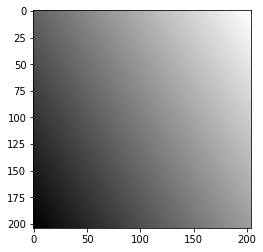

In [13]:
LS_reshape = LS.T.reshape(img.shape[0],img.shape[1])
print(LS_reshape.shape)
plt.imshow(LS_reshape, 'gray')

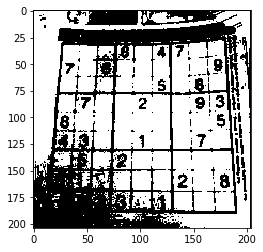

In [14]:
LS_img = np.ones((img.shape[0], img.shape[1]), dtype=np.int64)
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        if(img[i][j] > LS_reshape[i][j]):
            LS_img[i][j] = 100
        else:
            LS_img[i][j] = 0
plt.imshow(LS_img, 'gray')

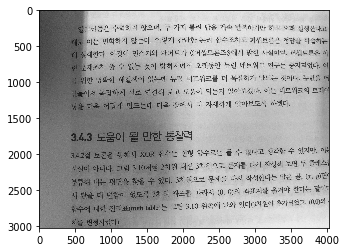

In [26]:
img= cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
imgplot = plt.imshow(img, 'gray')

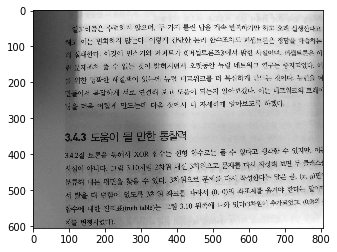

In [27]:
img = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_AREA)
imgplot = plt.imshow(img, 'gray')

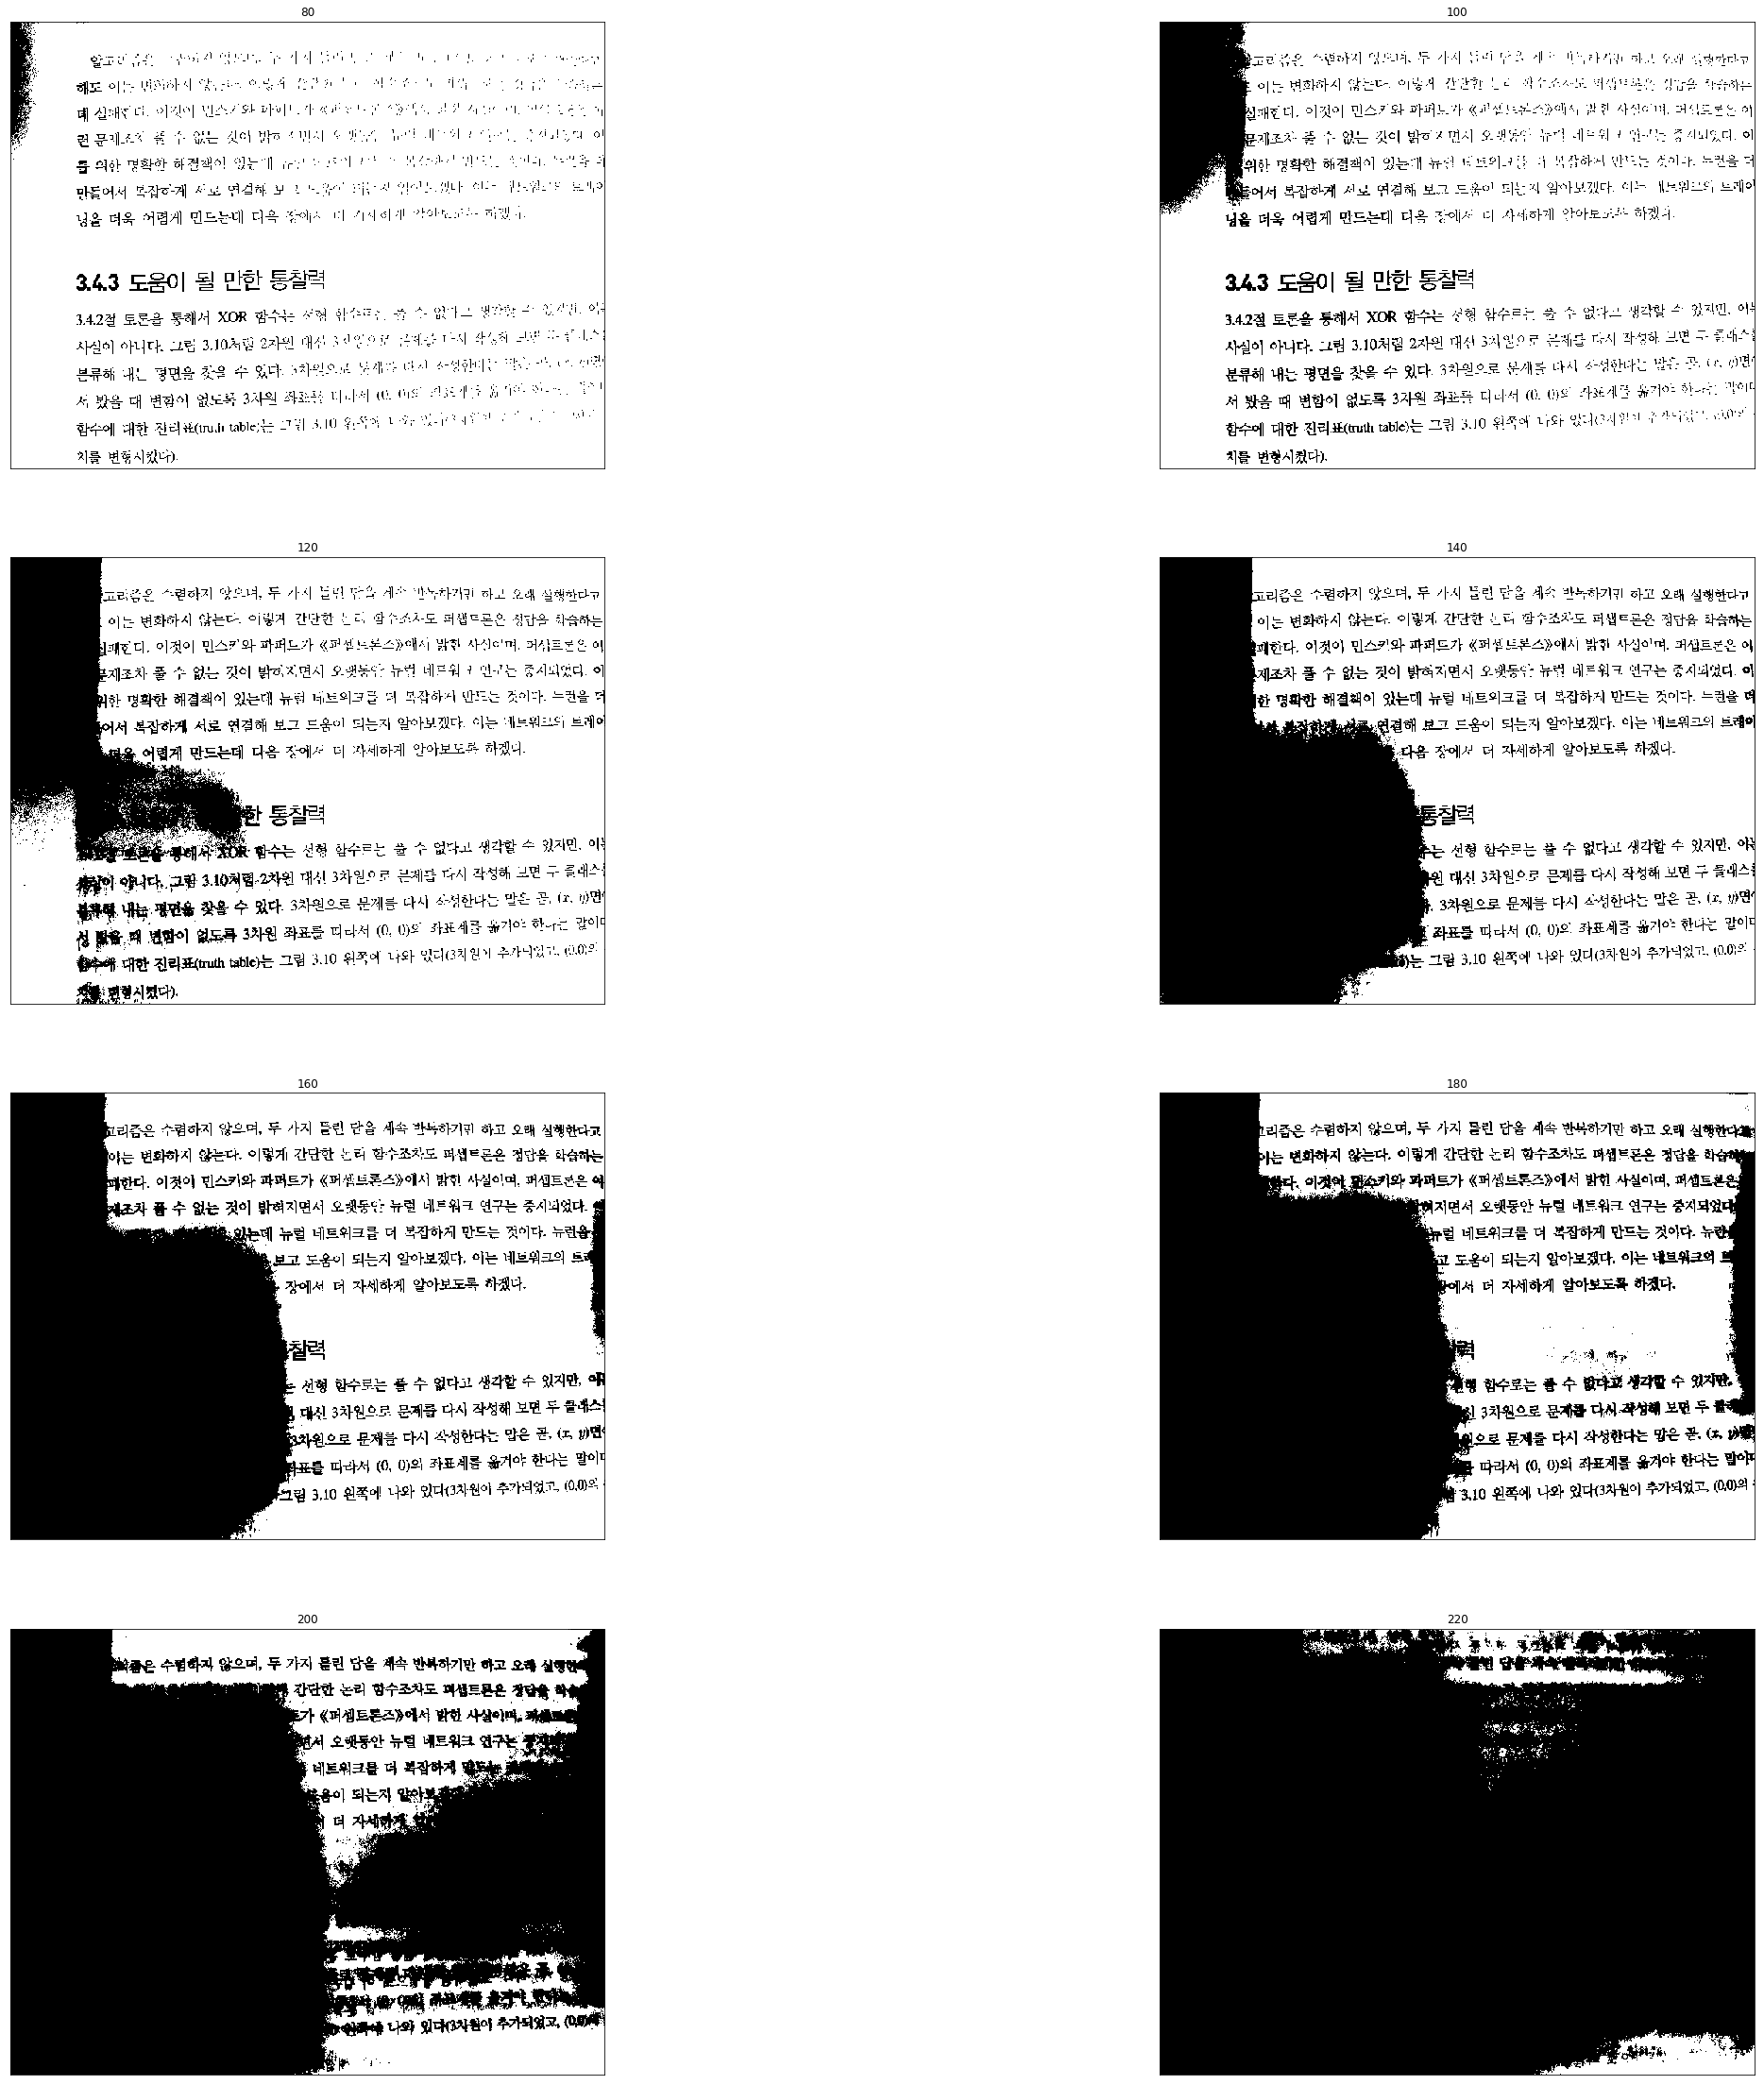

In [28]:
fig = plt.figure(figsize = (40, 40))

for i in range(1,9):
    ret, thresh = cv2.threshold(img,60+20*i,255, cv2.THRESH_BINARY)
    plt.subplot(4,2,i)
    plt.title(60+20*i)
    plt.imshow(thresh,'gray')
    plt.xticks([]),plt.yticks([])

In [29]:
print(img.shape)
img_flat = img.reshape(1, img.shape[0]*img.shape[1])
print(img_flat.shape)

(605, 806)
(1, 487630)


In [31]:
A = np.ones((img_flat.shape[1], 6), dtype=np.int64)
A.shape

(487630, 6)

In [32]:
for i in range(0,img_flat.shape[1]):
    A[i,0] = (i//img.shape[1] + 1)**2
    A[i,1] = (i%img.shape[1] + 1)**2
    A[i,2] = (i//img.shape[1] + 1)*(i%img.shape[1] + 1)
    A[i,3] = (i//img.shape[1] + 1)
    A[i,4] = (i%img.shape[1] + 1)
print(A)

[[     1      1      1      1      1      1]
 [     1      4      2      1      2      1]
 [     1      9      3      1      3      1]
 ...
 [366025 646416 486420    605    804      1]
 [366025 648025 487025    605    805      1]
 [366025 649636 487630    605    806      1]]


In [33]:
X = np.matmul(np.linalg.pinv(A),img_flat.T)
print(X.shape)

(6, 1)


In [34]:
LS = np.matmul(A, X)
print(LS.shape)

(487630, 1)


(605, 806)


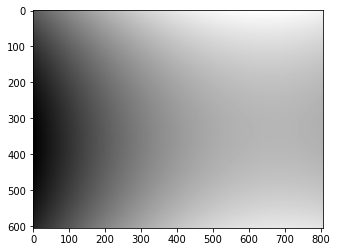

In [35]:
LS_reshape = LS.T.reshape(img.shape[0],img.shape[1])
print(LS_reshape.shape)
plt.imshow(LS_reshape, 'gray')

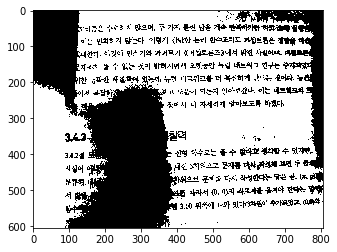

In [36]:
LS_img = np.ones((img.shape[0], img.shape[1]), dtype=np.int64)
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        if(img[i][j] > LS_reshape[i][j]):
            LS_img[i][j] = 255
        else:
            LS_img[i][j] = 0
plt.imshow(LS_img, 'gray')